In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from copy import copy
import numpy as np
import sympy as sp
from scipy.stats import rv_discrete
import scipy.integrate as spi
from scipy.stats import entropy
import math
import scipy.stats as stats
from scipy.stats import ttest_1samp


iris = load_iris()

dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset['classs'] = iris.target

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


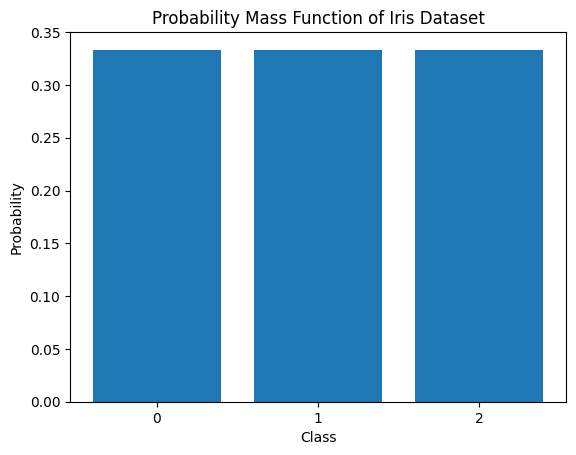

In [2]:
class_freq = dataset["classs"].value_counts()

class_freq_df = pd.DataFrame({
    "classs": class_freq.index,
    "freq": class_freq.values
})

prob = class_freq_df["freq"] / len(dataset)

class_freq_df["prob"] = prob

plt.bar(class_freq_df["classs"].values, class_freq_df["prob"].values)
plt.xticks(range(len(class_freq_df)), class_freq_df["classs"].values)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Probability Mass Function of Iris Dataset")
plt.show()

In [3]:
CDF = class_freq_df.cumsum()
CDF["classs"] = class_freq_df["classs"]
CDF["freq"] = class_freq_df["freq"]

In [4]:
CDF

,classs,freq,prob
0,0,50,0.333333
1,1,50,0.666667
2,2,50,1.000000


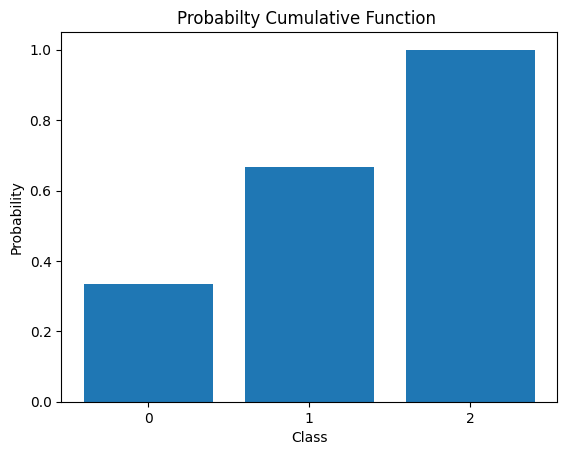

In [5]:
plt.bar(CDF["classs"].values, CDF["prob"].values)
plt.xticks(range(len(CDF)), CDF["classs"].values)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Probabilty Cumulative Function ")
plt.show()

In [6]:
plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

Text(0.5, 1.0, 'Estimation of PDF')

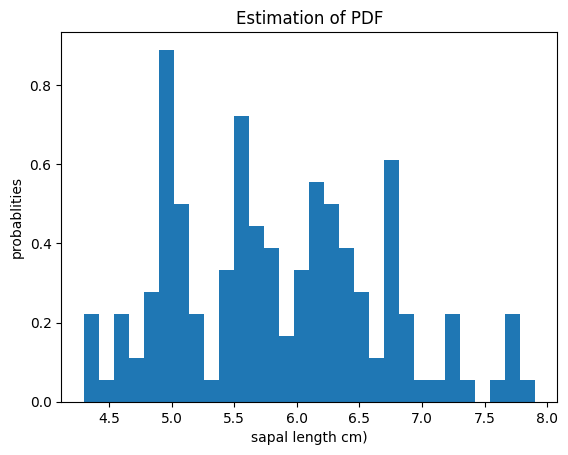

In [7]:
plt.hist(dataset['sepal length (cm)'], bins=30, density=True)
plt.xlabel("sapal length cm)")
plt.ylabel("probablities")
plt.title("Estimation of PDF")

## Dot Product

In [8]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
dataset["sepal length (cm)"].dot(dataset["petal width (cm)"])

1128.14

## Vector simple operation

In [10]:
dataset["sepal length (cm)"].add(dataset["petal width (cm)"])

0      5.3
1      5.1
2      4.9
3      4.8
4      5.2
      ... 
145    9.0
146    8.2
147    8.5
148    8.5
149    7.7
Length: 150, dtype: float64

## Visualizing vectors

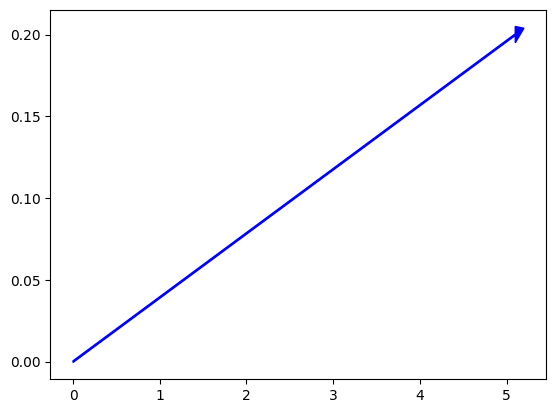

In [11]:
fig, ax = plt.subplots()
ax.arrow(0, 0, dataset['sepal length (cm)'][0], dataset['petal width (cm)'][0], head_width=0.01, head_length=0.1, fc='blue', ec='blue')



## Simple transformation

In [12]:
vector = dataset[["sepal length (cm)" ,'petal width (cm)' ]]
vector

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [13]:
vector = np.array(vector.iloc[0 , ])
vector

array([5.1, 0.2])

In [14]:
new_vector = [vector * 10 - 20]
new_vector

[array([ 31., -18.])]

## Visualizing transformation

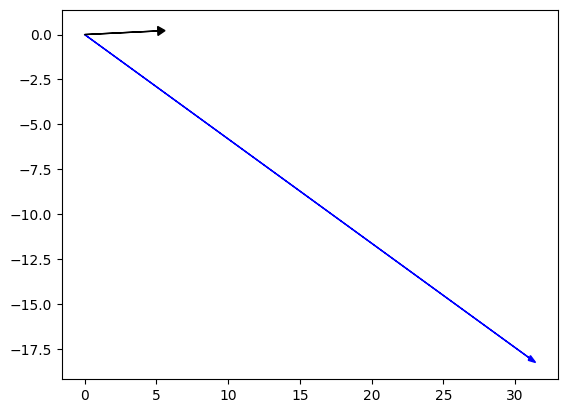

In [15]:
fig, ax = plt.subplots()
ax.arrow(0, 0, new_vector[0][0], new_vector[0][1], head_width=0.3, head_length=0.5, fc='blue', ec='blue')
ax.arrow(0, 0, dataset['sepal length (cm)'][0], dataset['petal width (cm)'][0], head_width=0.5, head_length=0.5, fc='black', ec='black')




## A matrix transformation

In [16]:
transform = np.array([[2, 1], [1, 2]])
transform

array([[2, 1],
       [1, 2]])

In [17]:
transformed_vector = [np.matmul(transform, vector)]
transformed_vector

[array([10.4,  5.5])]

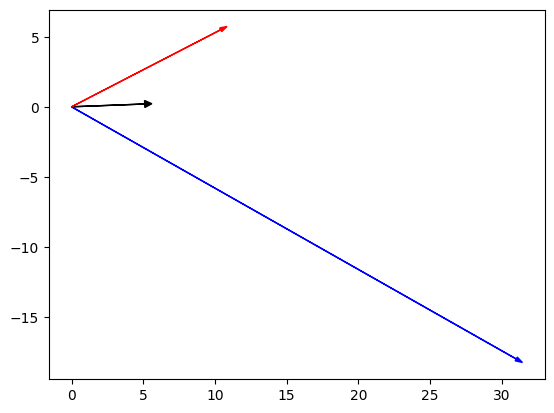

In [18]:
fig, ax = plt.subplots()
ax.arrow(0, 0, new_vector[0][0], new_vector[0][1], head_width=0.3, head_length=0.5, fc='blue', ec='blue')
ax.arrow(0, 0, dataset['sepal length (cm)'][0], dataset['petal width (cm)'][0], head_width=0.5, head_length=0.5, fc='black', ec='black')
ax.arrow(0, 0, transformed_vector[0][0], transformed_vector[0][1], head_width=0.3, head_length=0.5, fc='red', ec='red')


## Determinants 

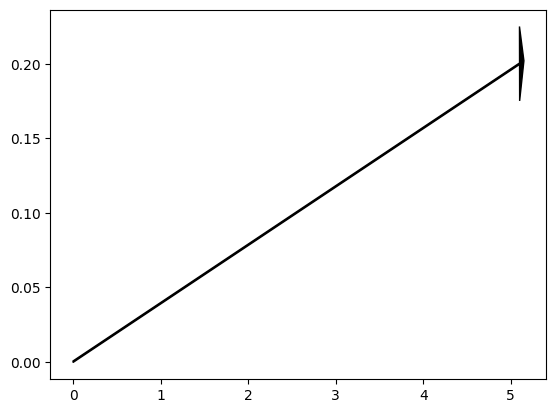

In [19]:
fig, ax = plt.subplots()
ax.arrow(0, 0, dataset['sepal length (cm)'][0], dataset['petal width (cm)'][0], head_width=0.05, head_length=0.05, fc='black', ec='black')

In [20]:
vector = dataset[["sepal length (cm)" ,'petal width (cm)' ]].iloc[0:2 , :]
vector
determinant = np.linalg.det(vector)
determinant

0.03999999999999985

## Matrix Inverse

In [21]:
inverse = np.linalg.inv(vector)
inverse

array([[   5. ,   -5. ],
       [-122.5,  127.5]])

In [22]:
vector

,sepal length (cm),petal width (cm)
0,5.1,0.2
1,4.9,0.2


In [23]:
np.array(np.matmul(vector , inverse))

array([[ 1.00000000e+00, -5.55111512e-18],
       [ 6.10622664e-17,  1.00000000e+00]])

## Derivatives and integrals

In [24]:
x = sp.Symbol('x')
y = x**3
y

x**3

In [25]:
dy_dx = sp.diff(y, x)
dy_dx

3*x**2

In [26]:
dy_dx2 = sp.diff(y, x ,2)
dy_dx2

6*x

In [27]:
dy_dx.subs(x, 2)

12

In [28]:
integral = sp.integrate(dy_dx , (x , 0 , 1))
integral

1

## eigenvalues eigenvectors


In [29]:
vector = np.array(vector)
vector

array([[5.1, 0.2],
       [4.9, 0.2]])

In [30]:
eigenvalues, eigenvectors = np.linalg.eig(vector)
eigenvectors

array([[ 0.72059116, -0.03924363],
       [ 0.69336021,  0.99922967]])

In [31]:
eigenvalues

array([5.29244205, 0.00755795])

## Expexcted value

In [32]:
pmf = [0.2, 0.3, 0.4, 0.1]
values = [1, 2, 3, 4]

# Create a discrete random variable object
discrete_rv = rv_discrete(values=(values, pmf))

expected_value = discrete_rv.mean()

print("Expected value:", expected_value)


Expected value: 2.4


In [33]:
def pdf(x):
    return 2*x

a = 0
b = 4

expected_value = np.trapz(pdf(np.linspace(a, b, num=100)), np.linspace(a, b, num=100))

print("Expected value:", expected_value)


Expected value: 16.0


<Axes: xlabel='classs', ylabel='sepal length (cm)'>

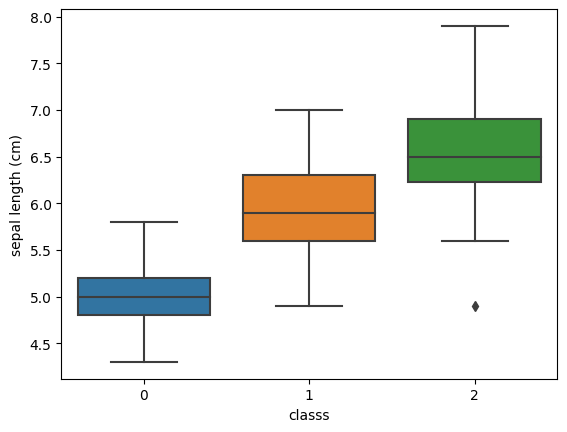

In [34]:
import seaborn as sns

sns.boxplot(x=dataset['classs'], y=dataset['sepal length (cm)'])



<BarContainer object of 300 artists>

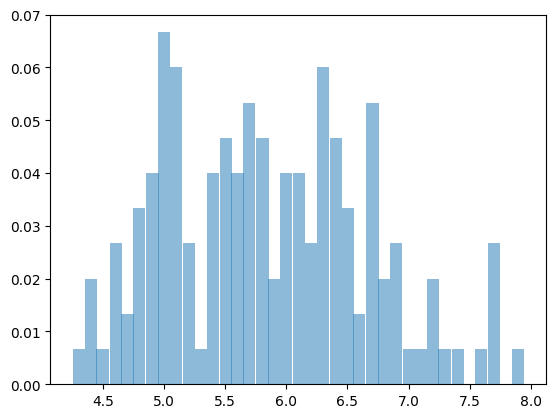

In [35]:
hist, bin_edges = np.histogram(dataset['sepal length (cm)'], bins=300, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)
pdf
plt.bar(bin_centers, pdf, width=0.1, alpha=0.5)


In [36]:
expected_value, _ = spi.quad(lambda x: x * np.interp(x, bin_centers, pdf), bin_centers[0], bin_centers[-1])
print("Expected value of sepal length: {:.2f}".format(expected_value))


Expected value of sepal length: 0.07


C:\Users\jamee\AppData\Local\Temp\ipykernel_21376\619184492.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  expected_value, _ = spi.quad(lambda x: x * np.interp(x, bin_centers, pdf), bin_centers[0], bin_centers[-1])


In [37]:
np.mean(np.array(dataset['sepal length (cm)']))

5.843333333333334

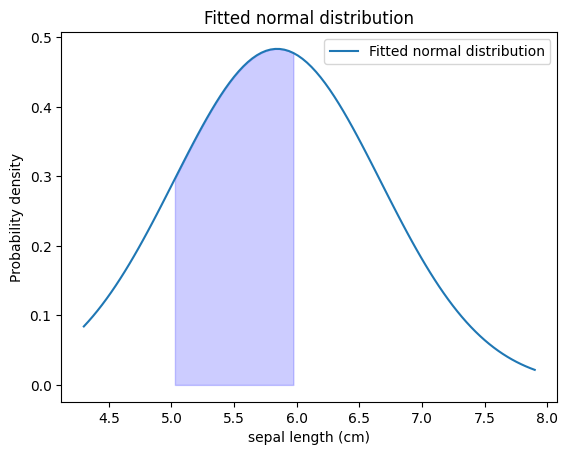

The probability of sepal length between 5 and 6 is 0.42


In [38]:
from scipy.stats import norm

# Fit a normal distribution to the data
mu, std = norm.fit(dataset['sepal length (cm)'])

# Define the range of values to plot the function
x = np.linspace(dataset['sepal length (cm)'].min(), dataset['sepal length (cm)'].max(), 100)

# Calculate the PDF using the fitted parameters
pdf_fit = norm.pdf(x, mu, std)

# Calculate the area under the curve between two values
a, b = 5, 6
prob = norm.cdf(b, mu, std) - norm.cdf(a, mu, std)

# Plot the fitted function and the area under the curve
plt.plot(x, pdf_fit, label='Fitted normal distribution')
plt.fill_between(x, pdf_fit, where=(x >= a) & (x <= b), color='blue', alpha=0.2)
plt.xlabel('sepal length (cm)')
plt.ylabel('Probability density')
plt.title('Fitted normal distribution')
plt.legend()
plt.show()

print(f'The probability of sepal length between {a} and {b} is {prob:.2f}')


## Markov Chains from scratch

In [39]:
MC = np.array(([0.2 , 0.6 , 0.2] ,
             [0.3 , 0 , 0.7],
             [0.5 , 0 , 0.5]))
MC

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

In [40]:
initial_vector = [1 , 0, 0]
initial_vector = np.matmul(initial_vector ,  MC)
initial_vector

array([0.2, 0.6, 0.2])

In [41]:
#Finding the stationary state with eigen vectors and values
eigenvalues, eigenvectors = np.linalg.eig(MC)
eigenvalues


array([ 1.  +0.j       , -0.15+0.3122499j, -0.15-0.3122499j])

In [42]:
eigenvectors

array([[-0.57735027+0.j        ,  0.70597631+0.j        ,
         0.70597631-0.j        ],
       [-0.57735027+0.j        , -0.26474112+0.4380559j ,
        -0.26474112-0.4380559j ],
       [-0.57735027+0.j        , -0.4412352 -0.21196253j,
        -0.4412352 +0.21196253j]])

In [43]:
# We only care about the first vector because it's eigenvalue corresponds to one which is the one that we care about
# since the stationary state is a an eijenvector with a scale of 1
#Using l1 normalization we obtain the stationary distrubtion as the sum of the state is equal to one since we are dealing with
# aprobablity distrubtion
# here we are dealing with complxex valued numbers so we take the abs of each engry and abs of the results

In [44]:
stationary_state = eigenvectors[0]
stationary_state = [ abs(prob/sum(abs(stationary_state))) for prob in stationary_state]
stationary_state

[0.29022743093214814, 0.3548862845339259, 0.3548862845339259]

## Entropy measure of surprise

In [45]:
pdf_fit 

array([0.08412707, 0.09126368, 0.09881368, 0.10678077, 0.11516642,
       0.12396971, 0.1331871 , 0.1428123 , 0.1528361 , 0.16324622,
       0.17402722, 0.18516041, 0.19662373, 0.20839179, 0.22043582,
       0.23272368, 0.24521999, 0.25788616, 0.27068057, 0.2835587 ,
       0.29647342, 0.30937514, 0.32221216, 0.33493098, 0.34747662,
       0.35979301, 0.3718234 , 0.3835108 , 0.39479837, 0.40562991,
       0.41595032, 0.42570605, 0.43484557, 0.44331983, 0.45108266,
       0.45809123, 0.46430643, 0.46969322, 0.47422096, 0.47786374,
       0.48060057, 0.48241562, 0.48329834, 0.48324361, 0.48225175,
       0.48032852, 0.47748508, 0.47373787, 0.46910848, 0.46362338,
       0.45731373, 0.45021507, 0.44236697, 0.43381266, 0.42459866,
       0.41477435, 0.40439152, 0.39350391, 0.38216679, 0.37043644,
       0.35836974, 0.34602369, 0.33345498, 0.32071956, 0.30787226,
       0.2949664 , 0.28205344, 0.26918269, 0.25640101, 0.24375257,
       0.23127865, 0.21901747, 0.20700405, 0.19527012, 0.18384

In [46]:
ent = entropy(pdf_fit , 2)
ent

0.18723589798518028

## Covariance and Colleration

In [47]:
#We say that a colleartaion exist using the abs(r) >= law 2/sqrt(sample_size)

In [48]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classs
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


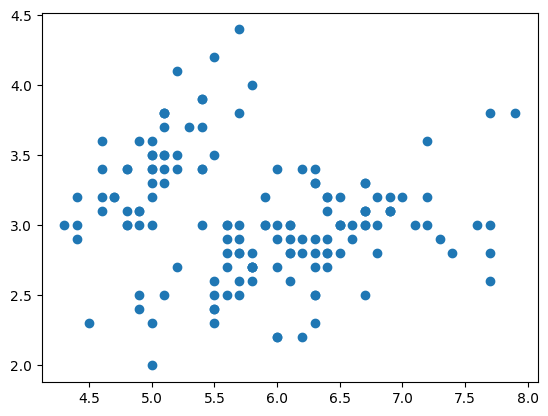

In [49]:
plt.figure()
plt.scatter(dataset['sepal length (cm)'] , dataset['sepal width (cm)'])

In [50]:
covariance = np.cov(np.array(dataset['sepal length (cm)']), np.array(dataset['sepal width (cm)']))[0][1]
correlation = dataset['sepal length (cm)'].corr(dataset['sepal width (cm)'])

if abs(correlation) >= 2/math.sqrt(len(dataset)):
    print("There is a linear colleration " ,correlation )
else:
    print("No linear colleration" , correlation)


No linear colleration -0.11756978413300198


## Cross entropy and KL divergence

In [51]:
mu, std = norm.fit(dataset['sepal length (cm)'])
x = np.linspace(dataset['sepal length (cm)'].min(), dataset['sepal length (cm)'].max(), 100)
P = norm.pdf(x , mu , std)
P

array([0.08412707, 0.09126368, 0.09881368, 0.10678077, 0.11516642,
       0.12396971, 0.1331871 , 0.1428123 , 0.1528361 , 0.16324622,
       0.17402722, 0.18516041, 0.19662373, 0.20839179, 0.22043582,
       0.23272368, 0.24521999, 0.25788616, 0.27068057, 0.2835587 ,
       0.29647342, 0.30937514, 0.32221216, 0.33493098, 0.34747662,
       0.35979301, 0.3718234 , 0.3835108 , 0.39479837, 0.40562991,
       0.41595032, 0.42570605, 0.43484557, 0.44331983, 0.45108266,
       0.45809123, 0.46430643, 0.46969322, 0.47422096, 0.47786374,
       0.48060057, 0.48241562, 0.48329834, 0.48324361, 0.48225175,
       0.48032852, 0.47748508, 0.47373787, 0.46910848, 0.46362338,
       0.45731373, 0.45021507, 0.44236697, 0.43381266, 0.42459866,
       0.41477435, 0.40439152, 0.39350391, 0.38216679, 0.37043644,
       0.35836974, 0.34602369, 0.33345498, 0.32071956, 0.30787226,
       0.2949664 , 0.28205344, 0.26918269, 0.25640101, 0.24375257,
       0.23127865, 0.21901747, 0.20700405, 0.19527012, 0.18384

In [52]:
mu, std = norm.fit(dataset['sepal width (cm)'])
x = np.linspace(dataset['sepal width (cm)'].min(), dataset['sepal width (cm)'].max(), 100)
Q = norm.pdf(x , mu , std)
Q

array([0.04749059, 0.05431507, 0.06192707, 0.07038632, 0.07975235,
       0.0900837 , 0.10143702, 0.11386604, 0.12742056, 0.14214522,
       0.15807841, 0.17525093, 0.19368484, 0.21339215, 0.23437363,
       0.25661767, 0.28009921, 0.30477877, 0.33060168, 0.35749741,
       0.38537919, 0.41414376, 0.44367146, 0.47382652, 0.5044577 ,
       0.53539911, 0.56647148, 0.59748355, 0.6282339 , 0.65851291,
       0.68810502, 0.7167912 , 0.74435157, 0.77056816, 0.79522774,
       0.81812467, 0.83906377, 0.85786303, 0.8743563 , 0.88839568,
       0.89985378, 0.90862558, 0.91463008, 0.91781153, 0.91814029,
       0.9156133 , 0.9102541 , 0.90211251, 0.89126381, 0.87780762,
       0.86186635, 0.84358338, 0.82312087, 0.80065739, 0.77638535,
       0.75050822, 0.72323774, 0.69479105, 0.66538783, 0.63524756,
       0.6045868 , 0.57361676, 0.54254092, 0.51155305, 0.48083533,
       0.45055682, 0.42087223, 0.39192095, 0.36382639, 0.33669559,
       0.3106191 , 0.28567116, 0.26191004, 0.23937864, 0.21810

In [53]:
cross_entropy = -np.sum(P * np.log(Q))
cross_entropy

19.7661178932573

In [54]:
kl_divergence = np.sum(P * np.log(P / Q))
kl_divergence

-10.469307025860195

## KL divergence function visualization

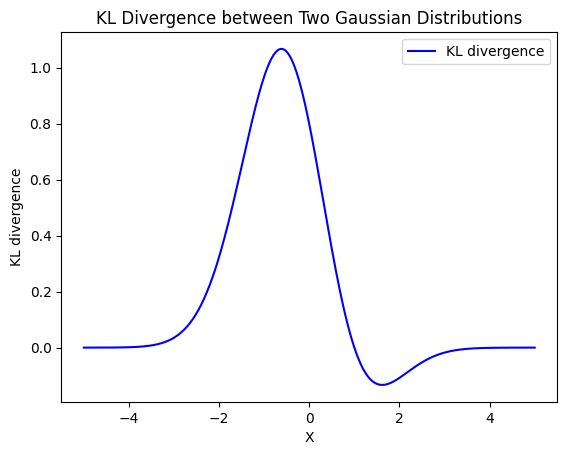

In [55]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define parameters of the two Gaussian distributions
mu1 = 0
sigma1 = 1
mu2 = 2
sigma2 = 1

# Define the range of the samples
xmin = -5
xmax = 5
n_samples = 500
x = np.linspace(xmin, xmax, n_samples)

# Calculate the probability densities of the two distributions at each sample point
p1 = norm.pdf(x, mu1, sigma1)
p2 = norm.pdf(x, mu2, sigma2)

# Calculate the KL divergence between the two distributions at each sample point
kl_div = p1 * np.log(p1 / p2)

# Plot the KL divergence as a function of x
fig = plt.figure()
plt.plot(x, kl_div, 'b-', label='KL divergence')
plt.xlabel('X')
plt.ylabel('KL divergence')
plt.title('KL Divergence between Two Gaussian Distributions')
plt.legend()
plt.show()



## P-value

In [56]:
# Thesehold is 0.05 to reject the null hypothisis

In [57]:
# P-value of  the hypothesis that the probatlity of getting a sepal length between 0.8 and 0.09 is special
# Therebefore we are trying to reject the null hypthosis that that range is not special

In [58]:
a, b = 0.8, 0.9
# Fit a normal distribution to the data
mu, std = norm.fit(dataset['sepal length (cm)'])
x = np.linspace(dataset['sepal length (cm)'].min(), dataset['sepal length (cm)'].max(), len(dataset))

# Calculate the PDF using the fitted parameters
pdf_fit = norm.pdf(x, mu, std)

mu, std = norm.fit(dataset['sepal length (cm)'])
random_prob = norm.cdf(b, mu, std) - norm.cdf(a, mu, std)
random_prob

5.555818622618241e-10

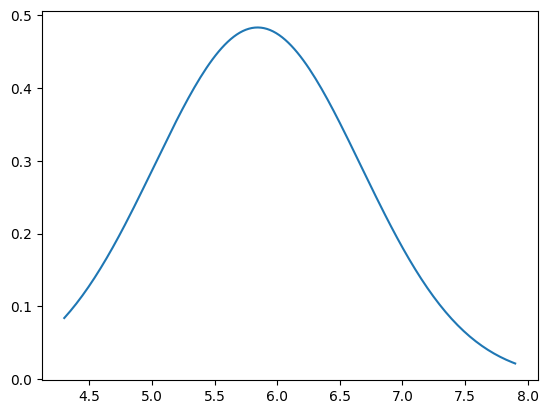

In [59]:
plt.figure()
plt.plot(x, pdf_fit, label='Fitted normal distribution')


In [60]:
prob_a_or_rarer = 1 - stats.norm.sf(a, mu, std)
prob_b_or_rarer = 1 - stats.norm.sf(b, mu, std)
prob_a_or_rarer

4.953554233466662e-10

In [61]:
prob_b_or_rarer

1.0509372261324756e-09

In [62]:
p_value = random_prob + prob_a_or_rarer + prob_b_or_rarer
p_value

2.101874511740966e-09

In [63]:
t_stat, p_val = ttest_1samp(dataset['sepal length (cm)'], 0.8)
p_val

6.848363028320532e-120

## Naive Bayees

In [64]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Extract the features and target classes
X = iris.data[: , 0].reshape(-1, 1)
y = iris.target


In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier and train it on the training data
model = GaussianNB()
model.fit(X_train, y_train)

# Use the model to predict the classes of the test data
y_pred = model.predict(X_test)

# Compute the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the Gaussian Naive Bayes classifier on the Iris dataset: {:.2f}%".format(accuracy * 100))


Accuracy of the Gaussian Naive Bayes classifier on the Iris dataset: 86.67%


## Gradient descent 

In [102]:
import math
import sympy as sp
from scipy.optimize import minimize

def function(x):
    return x**4+2*x**3+3*x**2+2*x+1

x = sp.Symbol('x')
y = function(x)
y_prime = sp.diff(y , x)
y_prime = sp.lambdify(x, y_prime)
y_prime(1)

18

In [103]:
y

x**4 + 2*x**3 + 3*x**2 + 2*x + 1

In [104]:
y.subs(x, 1)

9

In [105]:
x0 = 20
res = minimize(function, x0, jac=y_prime)

print(res)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.5625
        x: [-5.000e-01]
      nit: 18
      jac: [ 1.482e-08]
 hess_inv: [[ 3.333e-01]]
     nfev: 19
     njev: 19


In [106]:
y_prime(res["x"])

array([1.48156385e-08])

In [107]:
import math
import sympy as sp
from scipy.optimize import minimize

def function(x):
    return -(x**4+2*x**3+3*x**2+2*x+1)

x = sp.Symbol('x')
y = function(x)
y_prime = sp.diff(y , x)
y_prime = sp.lambdify(x, y_prime)
y_prime(1)

-18

In [108]:
#To maximize we simply negate our function meaning it will try to find the minimum values in the negation of our function
#Since the negation will reflect the function on the y-axis , minimum becomes maximum

In [109]:
x0 = 500
maxi = minimize(function , x0 , jac = y_prime)
y_prime(maxi["x"])

array([-1.44598759e+10])

In [110]:
y_prime = sp.diff(y , x)


In [111]:
y_prime

-4*x**3 - 6*x**2 - 6*x - 2